### Get line info

In [1]:
from astropy.table import Table, vstack
import glob

tbls = []
tbl_fns = glob.glob('/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/modeling/line_lists/*.csv')
for tbl_fn in tbl_fns:
    tbl = Table.read(tbl_fn)
    tbl.remove_column('Spectrum')
    tbls.append(tbl)
    
combined_tbls = vstack(tbls)
methanol_lines = combined_tbls[combined_tbls['Species'] == 'CH3OHvt=0-2']

In [2]:
# fn_107 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image"
# methanol_107 = methanol_lines[methanol_lines['freq_spw'] == '106_spw29']
# methanol_107

In [3]:
# from spectral_cube import SpectralCube
# from astropy import units as u

# cube_107 = SpectralCube.read(fn_107, use_dask=True).with_spectral_unit(u.GHz).to(u.K)
# print(cube_107)
# slc_107 = cube_107[:1].subcube_slices_from_mask(cube_107[:1].mask)
# cube_107 = cube_107[:,slc_107[1],slc_107[2]]
# cube_107.beam_threshold = 10000

# restf_107 = u.Quantity(methanol_107[0]['Frequency (GHz)'], u.GHz)
# vmin = -20*u.km/u.s # I did -10 km/s originally
# vmax = 25*u.km/u.s # I did 50 km/s and 70 km/s originally, then for mom0, I did 15 km/s

# if (cube_107.spectral_axis.min() < restf_107) and (cube_107.spectral_axis.max() > restf_107):
#     scube_107 = cube_107.with_spectral_unit(u.km/u.s, rest_value=restf_107, velocity_convention='radio').spectral_slab(vmin, vmax)
#     scube_107_lg = cube_107.with_spectral_unit(u.km/u.s, rest_value=restf_107, velocity_convention='radio').spectral_slab(-35*u.km/u.s,
#                                                                                                                           45*u.km/u.s)
#     m0_107 = scube_107.moment0(axis=0)
    
# # Make the mom0 better
# fn_pb_107 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb"
# pb_107 = SpectralCube.read(fn_pb_107, format = 'casa_image')
# m0_107_better = (m0_107*(m0_107.shape[0]*m0_107.shape[1]))/pb_107.sum()

### Matplotlib setup stuff

In [4]:
import matplotlib.pyplot as plt
import numpy as np

SM_SIZE = 10
MD_SIZE = 12
LG_SIZE = 16

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

### Plot mom0 map

In [5]:
# fig = plt.figure()

# ax = plt.subplot(projection = m0_107_better.wcs)
# im = ax.imshow(m0_107_better.value, origin = 'lower', cmap = 'Greys_r')
# cbar = plt.colorbar(im)
# cbar.set_label(r'Integrated intensity [K km$^{-1}$]')
# ax.set_ylabel('Declination')
# ax.set_xlabel('Right ascension')
# m0_107.write('m0_107.fits', overwrite = True)  

# plt.show()

### Plot mean spectrum

In [6]:
# mean_spectrum = scube_107_lg.mean(axis=(1,2))
# mean_spectrum.shape

In [7]:
# spec_ax = scube_107_lg.spectral_axis # .to(u.GHz, equivalencies=u.doppler_radio(restf_107)) # I have never had to do this before?
# spec_ax

In [8]:
# fig, ax = plt.subplots(figsize = (12, 6))

# ax.plot(spec_ax, np.array(mean_spectrum), linestyle = '-', color = 'k', linewidth = 2, drawstyle = 'steps-mid', label = "Mean spectrum")
# plt.xlabel(f"Radial velocity [{spec_ax.unit.to_string(format = 'latex_inline')}]") # f"Frequency [{spec_ax.unit}]"
# plt.ylabel(f"Brightness temperature [{mean_spectrum.unit}]")
# plt.xlim(np.min(spec_ax.value), np.max(spec_ax.value))
# ax.ticklabel_format(useOffset=False)
# plt.legend()

# plt.show()

### Plot spectra from both outflow cavity wall regions

In [9]:
# # Get regions and plot
# # https://spectral-cube.readthedocs.io/en/latest/spectral_extraction.html

# cavity_subcube_1 = scube_107_lg.subcube_from_ds9region('cavity_region_1.reg')
# cavity_subcube_2 = scube_107_lg.subcube_from_ds9region('cavity_region_2.reg')

# cavity_spectrum_1 = cavity_subcube_1.mean(axis=(1, 2))
# cavity_spectrum_2 = cavity_subcube_2.mean(axis=(1, 2))

### Plot everything together!

In [10]:
# fig = plt.figure(figsize = (18, 5)) #gridspec_kw={'width_ratios': [1, 2]}
# # fig = plt.figure()

# # Moment 0 map
# ax1 = plt.subplot(121, projection = m0_107_better.wcs)
# im1 = ax1.imshow(m0_107_better.value, origin = 'lower', cmap = 'inferno')
# cbar1 = plt.colorbar(im1, ax=ax1)
# cbar1.set_label(r'Integrated intensity [K km s$^{-1}$]')
# ax1.set_ylabel('Declination')
# ax1.set_xlabel('Right ascension')

# # Plot cavity regions
# import regions

# cavity_region_1 = regions.Regions.read('cavity_region_1.reg')[0]
# cavity_region_1_pixel = cavity_region_1.to_pixel(m0_107_better.wcs)
# cavity_region_2 = regions.Regions.read('cavity_region_2.reg')[0]
# cavity_region_2_pixel = cavity_region_2.to_pixel(m0_107_better.wcs)
# cavity_region_1_pixel.plot(edgecolor = 'r', linewidth = 2, linestyle = 'dashed', ax=ax1)
# cavity_region_2_pixel.plot(edgecolor = 'b', linewidth = 2, linestyle = 'dashed', ax=ax1)

# # Mean spectrum and cavity spectra
# ax2 = plt.subplot(122)
# ax2.plot(spec_ax, np.array(mean_spectrum), linestyle = '-', color = 'k', linewidth = 2, drawstyle = 'steps-mid', label = "Mean spectrum")
# ax2.plot(spec_ax, np.array(cavity_spectrum_1), linestyle = 'dashed', color = 'r', linewidth = 2, drawstyle = 'steps-mid', label = "Cavity wall spectrum (left)")
# ax2.plot(spec_ax, np.array(cavity_spectrum_2), linestyle = 'dashed', color = 'b', linewidth = 2, drawstyle = 'steps-mid', label = "Cavity wall spectrum (right)")
# ax2.axvspan(vmin.value, vmax.value, alpha=0.5, color='grey')
# ax2.set_xlabel(f"Radial velocity [{spec_ax.unit.to_string(format = 'latex_inline')}]") # f"Frequency [{spec_ax.unit}]"
# ax2.set_ylabel(f"Brightness temperature [{mean_spectrum.unit}]")
# ax2.set_xlim(np.min(spec_ax.value), np.max(spec_ax.value))
# ax2.ticklabel_format(useOffset=False)
# ax2.legend()

# plt.suptitle("CLEAN", y = 0.93)

# fig.tight_layout()
# plt.savefig("632e0742965a6e88270d73d7/figures/spectral_extraction.pdf", bbox_inches = 'tight')
# plt.savefig("632e0742965a6e88270d73d7/figures/spectral_extraction.png", dpi = 250, bbox_inches = 'tight')
# plt.show()

## Make this figure again, but use dirty image ("ground truth")

In [11]:
# fn_107 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_dirty.image"
# methanol_107 = methanol_lines[methanol_lines['freq_spw'] == '106_spw29']
# methanol_107

In [12]:
# from spectral_cube import SpectralCube
# from astropy import units as u

# cube_107 = SpectralCube.read(fn_107, use_dask=True).with_spectral_unit(u.GHz).to(u.K)
# slc_107 = cube_107[:1].subcube_slices_from_mask(cube_107[:1].mask)
# cube_107 = cube_107[:,slc_107[1],slc_107[2]]
# cube_107.beam_threshold = 10000

# restf_107 = u.Quantity(methanol_107[0]['Frequency (GHz)'], u.GHz)
# vmin = -20*u.km/u.s # I did -10 km/s originally
# vmax = 25*u.km/u.s # I did 50 km/s and 70 km/s originally, then for mom0, I did 15 km/s

# if (cube_107.spectral_axis.min() < restf_107) and (cube_107.spectral_axis.max() > restf_107):
#     scube_107 = cube_107.with_spectral_unit(u.km/u.s, rest_value=restf_107, velocity_convention='radio').spectral_slab(vmin, vmax)
#     scube_107_lg = cube_107.with_spectral_unit(u.km/u.s, rest_value=restf_107, velocity_convention='radio').spectral_slab(-35*u.km/u.s,
#                                                                                                                           45*u.km/u.s)
#     m0_107 = scube_107.moment0(axis=0)
    
# # Make the mom0 better
# fn_pb_107 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb"
# pb_107 = SpectralCube.read(fn_pb_107, format = 'casa_image')
# m0_107_better = (m0_107*(m0_107.shape[0]*m0_107.shape[1]))/pb_107.sum()

### Plot mom0 map

In [13]:
# fig = plt.figure()

# ax = plt.subplot(projection = m0_107_better.wcs)
# im = ax.imshow(m0_107_better.value, origin = 'lower', cmap = 'Greys_r')
# cbar = plt.colorbar(im)
# cbar.set_label(r'Integrated intensity [K km$^{-1}$]')
# ax.set_ylabel('Declination')
# ax.set_xlabel('Right ascension')
# # m0_107.write('m0_107.fits', overwrite = True)  

# plt.show()

### Plot mean spectrum

In [14]:
# mean_spectrum = scube_107_lg.mean(axis=(1,2))
# mean_spectrum.shape

In [15]:
# spec_ax = scube_107_lg.spectral_axis # .to(u.GHz, equivalencies=u.doppler_radio(restf_107)) # I have never had to do this before?
# spec_ax

In [16]:
# fig, ax = plt.subplots(figsize = (12, 6))

# ax.plot(spec_ax, np.array(mean_spectrum), linestyle = '-', color = 'k', linewidth = 2, drawstyle = 'steps-mid', label = "Mean spectrum")
# plt.xlabel(f"Radial velocity [{spec_ax.unit.to_string(format = 'latex_inline')}]") # f"Frequency [{spec_ax.unit}]"
# plt.ylabel(f"Brightness temperature [{mean_spectrum.unit}]")
# plt.xlim(np.min(spec_ax.value), np.max(spec_ax.value))
# ax.ticklabel_format(useOffset=False)
# plt.legend()

# plt.show()

### Plot spectra from both outflow cavity wall regions

In [17]:
# # Get regions and plot
# # https://spectral-cube.readthedocs.io/en/latest/spectral_extraction.html

# cavity_subcube_1 = scube_107_lg.subcube_from_ds9region('cavity_region_1.reg')
# cavity_subcube_2 = scube_107_lg.subcube_from_ds9region('cavity_region_2.reg')

# cavity_spectrum_1 = cavity_subcube_1.mean(axis=(1, 2))
# cavity_spectrum_2 = cavity_subcube_2.mean(axis=(1, 2))

### Plot everything together!

In [18]:
# fig = plt.figure(figsize = (18, 5)) #gridspec_kw={'width_ratios': [1, 2]}
# # fig = plt.figure()

# # Moment 0 map
# ax1 = plt.subplot(121, projection = m0_107_better.wcs)
# im1 = ax1.imshow(m0_107_better.value, origin = 'lower', cmap = 'inferno')
# cbar1 = plt.colorbar(im1, ax=ax1)
# cbar1.set_label(r'Integrated intensity [K km s$^{-1}$]')
# ax1.set_ylabel('Declination')
# ax1.set_xlabel('Right ascension')

# # Plot cavity regions
# import regions

# cavity_region_1 = regions.Regions.read('cavity_region_1.reg')[0]
# cavity_region_1_pixel = cavity_region_1.to_pixel(m0_107_better.wcs)
# cavity_region_2 = regions.Regions.read('cavity_region_2.reg')[0]
# cavity_region_2_pixel = cavity_region_2.to_pixel(m0_107_better.wcs)
# cavity_region_1_pixel.plot(edgecolor = 'r', linewidth = 2, linestyle = 'dashed', ax=ax1)
# cavity_region_2_pixel.plot(edgecolor = 'b', linewidth = 2, linestyle = 'dashed', ax=ax1)

# # Mean spectrum and cavity spectra
# ax2 = plt.subplot(122)
# ax2.plot(spec_ax, np.array(mean_spectrum), linestyle = '-', color = 'k', linewidth = 2, drawstyle = 'steps-mid', label = "Mean spectrum")
# ax2.plot(spec_ax, np.array(cavity_spectrum_1), linestyle = 'dashed', color = 'r', linewidth = 2, drawstyle = 'steps-mid', label = "Cavity wall spectrum (left)")
# ax2.plot(spec_ax, np.array(cavity_spectrum_2), linestyle = 'dashed', color = 'b', linewidth = 2, drawstyle = 'steps-mid', label = "Cavity wall spectrum (right)")
# ax2.axvspan(vmin.value, vmax.value, alpha=0.5, color='grey')
# ax2.set_xlabel(f"Radial velocity [{spec_ax.unit.to_string(format = 'latex_inline')}]") # f"Frequency [{spec_ax.unit}]"
# ax2.set_ylabel(f"Brightness temperature [{mean_spectrum.unit}]")
# ax2.set_xlim(np.min(spec_ax.value), np.max(spec_ax.value))
# ax2.ticklabel_format(useOffset=False)
# ax2.legend()

# plt.suptitle("DIRTY", y = 0.93)

# fig.tight_layout()
# plt.savefig("632e0742965a6e88270d73d7/figures/spectral_extraction_dirty.pdf", bbox_inches = 'tight')
# plt.savefig("632e0742965a6e88270d73d7/figures/spectral_extraction_dirty.png", dpi = 250, bbox_inches = 'tight')
# plt.show()

## Make this figure again, but use multiscale-cleaned image

In [19]:
fn_107 = "/blue/adamginsburg/abulatek/brick/dasar/recleaning/brick_107GHz_dasar_line_1mJy_multiscale.image"
methanol_107 = methanol_lines[methanol_lines['freq_spw'] == '106_spw29']
methanol_107

Dataset,freq_spw,Spectrum type,Species,QNs,Frequency (GHz),Observed frequency (GHz),Velocity (km/s),Comment,E_u (K)
str7,str10,str7,str22,str38,float64,float64,float64,str170,float64
data_59,106_spw29,mean,CH3OHvt=0-2,"3(1,3)-4(0,4)A,vt=0",107.013831,107.0106,9.0,Absorption against the CMB!!! https://ui.adsabs.harvard.edu/abs/2008A%26A...489.1175P/abstract,--
data_59,106_spw29,mean,CH3OHvt=0-2,"3(1,3)-4(0,4)A,vt=0",107.013831,107.0106,9.0,Absorption against the CMB!!! https://ui.adsabs.harvard.edu/abs/2008A%26A...489.1175P/abstract,--


In [20]:
from spectral_cube import SpectralCube
from astropy import units as u

cube_107 = SpectralCube.read(fn_107, use_dask=True).with_spectral_unit(u.GHz).to(u.K)
print(cube_107)
slc_107 = cube_107[:1].subcube_slices_from_mask(cube_107[:1].mask)
cube_107 = cube_107[:,slc_107[1],slc_107[2]]
cube_107.beam_threshold = 10000
print(cube_107)

restf_107 = u.Quantity(methanol_107[0]['Frequency (GHz)'], u.GHz)
vmin = -20*u.km/u.s # I did -10 km/s originally
vmax = 25*u.km/u.s # I did 50 km/s and 70 km/s originally, then for mom0, I did 15 km/s

if (cube_107.spectral_axis.min() < restf_107) and (cube_107.spectral_axis.max() > restf_107):
    scube_107 = cube_107.with_spectral_unit(u.km/u.s, rest_value=restf_107, velocity_convention='radio').spectral_slab(vmin, vmax)
    scube_107_lg = cube_107.with_spectral_unit(u.km/u.s, rest_value=restf_107, velocity_convention='radio').spectral_slab(-35*u.km/u.s,
                                                                                                                          45*u.km/u.s)
    m0_107 = scube_107.moment0(axis=0)
    
# Make the mom0 better
fn_pb_107 = "/blue/adamginsburg/abulatek/brick/dasar/recleaning/brick_107GHz_dasar_line_1mJy_multiscale.pb" # "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb"
fn_pb_107_original = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb"
pb_107 = SpectralCube.read(fn_pb_107, format = 'casa_image')
pb_107_original = SpectralCube.read(fn_pb_107_original, format = 'casa_image')
m0_107_better = (m0_107*(m0_107.shape[0]*m0_107.shape[1]))/pb_107.sum()
print("multiscale:",pb_107.sum())
print("original:",pb_107_original.sum())

/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


DaskVaryingResolutionSpectralCube with shape=(48, 512, 512) and unit=K and chunk size (48, 512, 512):
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
 n_s:     48  type_s: FREQ      unit_s: GHz    range:      106.988 GHz:     107.034 GHz
DaskVaryingResolutionSpectralCube with shape=(48, 407, 407) and unit=K and chunk size (48, 407, 407):
 n_x:    407  type_x: RA---SIN  unit_x: deg    range:   266.531424 deg:  266.557143 deg
 n_y:    407  type_y: DEC--SIN  unit_y: deg    range:   -28.716208 deg:  -28.693652 deg
 n_s:     48  type_s: FREQ      unit_s: GHz    range:      106.988 GHz:     107.034 GHz


/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/radio_beam-0.3.3-py3.9.egg/radio_beam/multiple_beams.py:265: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


multiscale: 3250618.75
original: 131322624.0


In [21]:
list(pb_107[:,256,256] == 1.).count(False)

0

### Plot mom0 map

In [22]:
# fig = plt.figure()

# ax = plt.subplot(projection = m0_107_better.wcs)
# im = ax.imshow(m0_107_better.value, origin = 'lower', cmap = 'Greys_r')
# cbar = plt.colorbar(im)
# cbar.set_label(r'Integrated intensity [K km$^{-1}$]')
# ax.set_ylabel('Declination')
# ax.set_xlabel('Right ascension')
# # m0_107.write('m0_107.fits', overwrite = True)  

# plt.show()

### Plot mean spectrum

In [23]:
mean_spectrum = scube_107_lg.mean(axis=(1,2))
mean_spectrum.shape

(30,)

In [24]:
spec_ax = scube_107_lg.spectral_axis # .to(u.GHz, equivalencies=u.doppler_radio(restf_107)) # I have never had to do this before?
spec_ax

<Quantity [ 44.53069121,  41.79527413,  39.05985705,  36.32443997,
            33.58902289,  30.85360581,  28.11818874,  25.38277166,
            22.64735458,  19.9119375 ,  17.17652042,  14.44110334,
            11.70568627,   8.97026919,   6.23485211,   3.49943503,
             0.76401795,  -1.97139913,  -4.7068162 ,  -7.44223328,
           -10.17765036, -12.91306744, -15.64848452, -18.3839016 ,
           -21.11931867, -23.85473575, -26.59015283, -29.32556991,
           -32.06098699, -34.79640407] km / s>

In [25]:
spec_ax[5] - spec_ax[4]

<Quantity -2.73541708 km / s>

In [26]:
# fig, ax = plt.subplots(figsize = (12, 6))

# ax.plot(spec_ax, np.array(mean_spectrum), linestyle = '-', color = 'k', linewidth = 2, drawstyle = 'steps-mid', label = "Mean spectrum")
# plt.xlabel(f"Radial velocity [{spec_ax.unit.to_string(format = 'latex_inline')}]") # f"Frequency [{spec_ax.unit}]"
# plt.ylabel(f"Brightness temperature [{mean_spectrum.unit}]")
# plt.xlim(np.min(spec_ax.value), np.max(spec_ax.value))
# ax.ticklabel_format(useOffset=False)
# plt.legend()

# plt.show()

### Plot spectra from both outflow cavity wall regions (now using stuff from better_regions.ipynb)

#### Get smoothed region

(407, 407)


0.03466819594080427


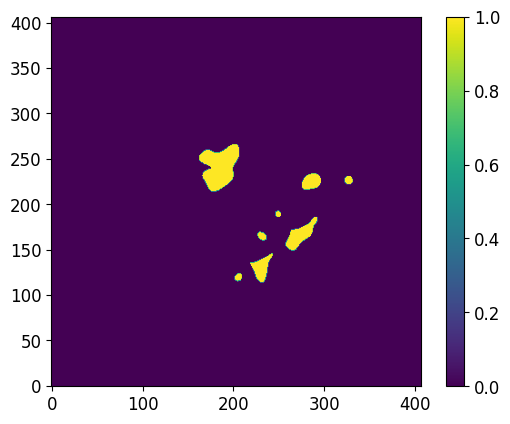

In [27]:
# Get regions and plot
# https://spectral-cube.readthedocs.io/en/latest/spectral_extraction.html

# cavity_subcube_1 = scube_107_lg.subcube_from_ds9region('cavity_region_1.reg')
# cavity_subcube_2 = scube_107_lg.subcube_from_ds9region('cavity_region_2.reg')

# cavity_spectrum_1 = cavity_subcube_1.mean(axis=(1, 2))
# cavity_spectrum_2 = cavity_subcube_2.mean(axis=(1, 2))

# Do continuum subtraction
med = scube_107_lg.median(axis=0)  
print(med.shape)
scube_107_lg_contsub = scube_107_lg - med

# Minimum intensity map
min_map = scube_107_lg_contsub.min(axis=0)

# Get sigma
sigma = scube_107_lg_contsub.mad_std().value
print(sigma)

# Get mask using new better_regions.ipynb

# A very stupid way to get the mask, but it's a way
# [m, n] = np.where(min_map < -4*sigma*u.K)
# min_map_mask = np.zeros(min_map.shape, dtype='bool')
# min_map_mask[m, n] = 1 # Mask the areas below 4 sigma
# The above mask does not get used at all???

from astropy.convolution import convolve_fft, Gaussian2DKernel
min_map_smooth = convolve_fft(min_map, Gaussian2DKernel(5))
min_map_smooth_mask = min_map_smooth < -3.3*sigma*u.K

min_map_smooth_mask_5sigma = min_map_smooth < -4.8*sigma*u.K

import scipy.ndimage
min_map_smooth_mask_d1 = scipy.ndimage.binary_dilation(min_map_smooth_mask, iterations = 1)
min_map_smooth_mask_d1_e7 = scipy.ndimage.binary_erosion(min_map_smooth_mask_d1, iterations = 7)
min_map_smooth_mask_d1_e7_d7 = scipy.ndimage.binary_dilation(min_map_smooth_mask_d1_e7, iterations = 7)

min_map_smooth_mask_5sigma_d1 = scipy.ndimage.binary_dilation(min_map_smooth_mask_5sigma, iterations = 1)
min_map_smooth_mask_5sigma_d1_e7 = scipy.ndimage.binary_erosion(min_map_smooth_mask_5sigma_d1, iterations = 2)
min_map_smooth_mask_5sigma_d1_e7_d7 = scipy.ndimage.binary_dilation(min_map_smooth_mask_5sigma_d1_e7, iterations = 7)

good = np.unique(scipy.ndimage.label(min_map_smooth_mask)[0][min_map_smooth_mask_d1_e7_d7.astype('bool')])

good_5sigma = np.unique(scipy.ndimage.label(min_map_smooth_mask_5sigma)[0][min_map_smooth_mask_5sigma_d1_e7_d7.astype('bool')])

final_smoothed_mask = np.isin(scipy.ndimage.label(min_map_smooth_mask)[0], good[1:])

final_smoothed_mask_5sigma = np.isin(scipy.ndimage.label(min_map_smooth_mask_5sigma)[0], good_5sigma[1:])

plt.imshow(final_smoothed_mask_5sigma, origin = 'lower')
plt.colorbar()

scube_107_lg_masked = scube_107_lg.with_mask(final_smoothed_mask)

scube_107_lg_masked_5sigma = scube_107_lg.with_mask(final_smoothed_mask_5sigma)

cavity_spectrum = scube_107_lg_masked.mean(axis=(1,2))

cavity_spectrum_5sigma = scube_107_lg_masked_5sigma.mean(axis=(1,2))

In [28]:
m0_107_better.unit

Unit("K km / s")

### Plot everything together!

/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:235: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


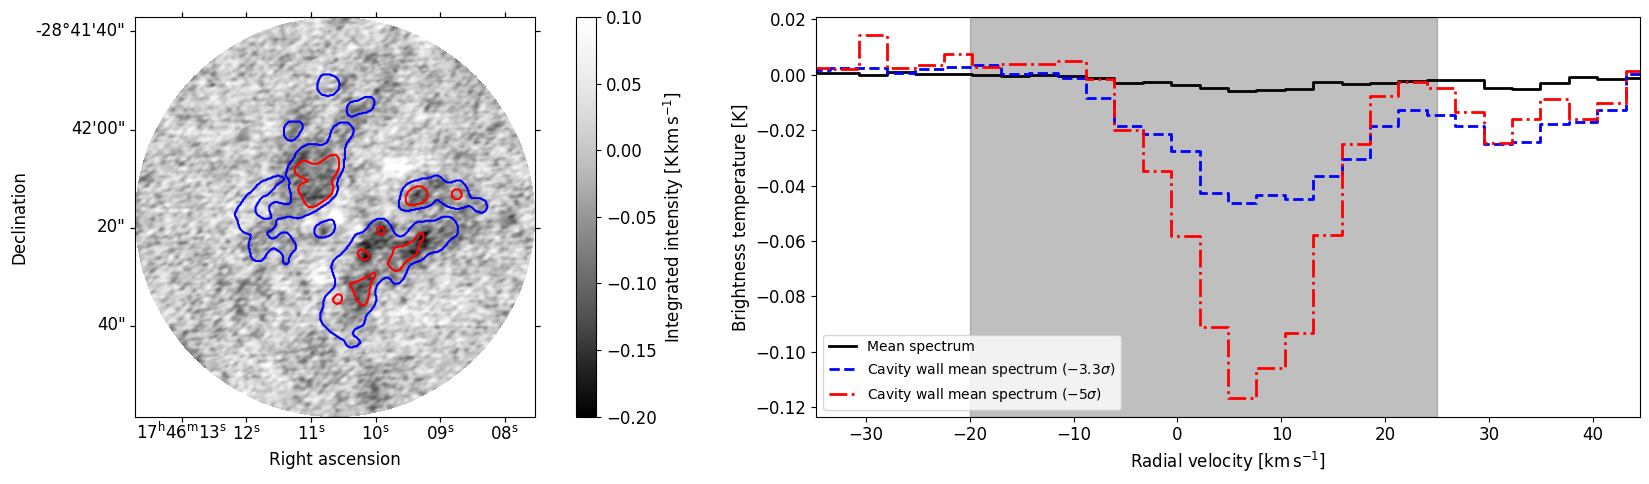

In [29]:
import matplotlib.colors as colors

fig = plt.figure(figsize = (18, 5)) #gridspec_kw={'width_ratios': [1, 2]}
# fig = plt.figure()

# Moment 0 map
ax1 = plt.subplot(121, projection = m0_107_better.wcs)
im1 = ax1.imshow(m0_107_better.value, origin = 'lower', vmin = -0.2, vmax = 0.1, cmap = 'Greys_r') # vmin = -0.005, vmax = 0.0025
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label(f"Integrated intensity [{m0_107_better.unit.to_string(format = 'latex_inline')}]")
ax1.set_ylabel('Declination')
ax1.set_xlabel('Right ascension')

# Plot cavity regions
# import regions

# cavity_region_1 = regions.Regions.read('cavity_region_1.reg')[0]
# cavity_region_1_pixel = cavity_region_1.to_pixel(m0_107_better.wcs)
# cavity_region_2 = regions.Regions.read('cavity_region_2.reg')[0]
# cavity_region_2_pixel = cavity_region_2.to_pixel(m0_107_better.wcs)
# cavity_region_1_pixel.plot(edgecolor = 'r', linewidth = 2, linestyle = 'dashed', ax=ax1)
# cavity_region_2_pixel.plot(edgecolor = 'b', linewidth = 2, linestyle = 'dashed', ax=ax1)

cs1 = ax1.contour(final_smoothed_mask, levels = [0, 1], colors = ['b'])
cs2 = ax1.contour(final_smoothed_mask_5sigma, levels = [0, 1], colors = ['r'])

# Mean spectrum and cavity spectra
ax2 = plt.subplot(122)
ax2.plot(spec_ax, np.array(mean_spectrum), linestyle = '-', color = 'k', linewidth = 2, drawstyle = 'steps-mid', label = "Mean spectrum")
# ax2.plot(spec_ax, np.array(cavity_spectrum_1), linestyle = 'dashed', color = 'r', linewidth = 2, drawstyle = 'steps-mid', label = "Cavity wall spectrum (left)")
# ax2.plot(spec_ax, np.array(cavity_spectrum_2), linestyle = 'dashed', color = 'b', linewidth = 2, drawstyle = 'steps-mid', label = "Cavity wall spectrum (right)")
ax2.plot(spec_ax, np.array(cavity_spectrum), linestyle = 'dashed', color = 'b', linewidth = 2, drawstyle = 'steps-mid', label = "Cavity wall mean spectrum ($-3.3\sigma$)")
ax2.plot(spec_ax, np.array(cavity_spectrum_5sigma), linestyle = 'dashdot', color = 'r', linewidth = 2, drawstyle = 'steps-mid', label = "Cavity wall mean spectrum ($-5\sigma$)")

ax2.axvspan(vmin.value, vmax.value, alpha=0.5, color='grey')
ax2.set_xlabel(f"Radial velocity [{spec_ax.unit.to_string(format = 'latex_inline')}]") # f"Frequency [{spec_ax.unit}]"
ax2.set_ylabel(f"Brightness temperature [{mean_spectrum.unit}]")
ax2.set_xlim(np.min(spec_ax.value), np.max(spec_ax.value))
ax2.ticklabel_format(useOffset=False)
ax2.legend()

fig.tight_layout()
plt.savefig("632e0742965a6e88270d73d7/figures/spectral_extraction_multiscale.pdf", bbox_inches = 'tight')
plt.savefig("632e0742965a6e88270d73d7/figures/spectral_extraction_multiscale.png", dpi = 250, bbox_inches = 'tight')
plt.show()

In [30]:
np.nanmin(m0_107_better)

<Projection -0.21727524 K km / s>

In [31]:
print(np.nanmin(cavity_spectrum))
print(np.nanmin(cavity_spectrum_5sigma))

-0.046168366633735275 K
-0.11681499862978632 K
